In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Salary.csv")
dataset.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
#Data Cleaning
#Checking for null values, duplicate rows, and dropping unneeded columns.

In [5]:
dataset.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
dataset.describe

<bound method NDFrame.describe of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD      

In [7]:
dataset_original = dataset.copy()

dataset.drop(columns=['Unnamed: 0'], inplace=True) #Droping the first column Unnamed:0 and checking for duplicate rows
duplicate_rows = dataset.duplicated()
dataset[duplicate_rows].head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [8]:
dataset.drop_duplicates(inplace=True)
dataset.drop(columns=['salary','salary_currency'], inplace=True) #Drop the duplicate rows, as well as the columns Salary and Salary_Currency as we will be using Salary_in_usd 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    int64 
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(3), object(6)
memory usage: 44.1+ KB


In [9]:
#Plotting Salary and Number of Jobs based on various factors

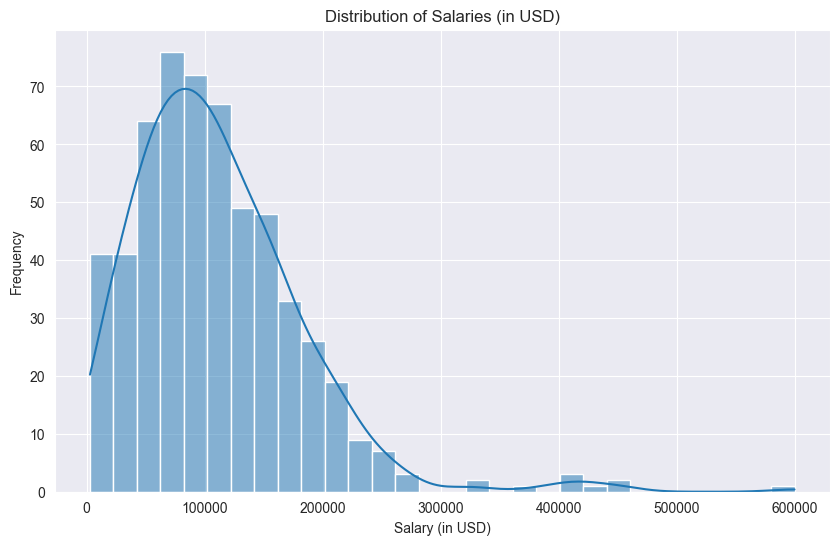

In [10]:
sns.set_style("darkgrid")

# Distribution of salaries in USD
plt.figure(figsize=(10, 6))
sns.histplot(dataset['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Frequency')
plt.show()

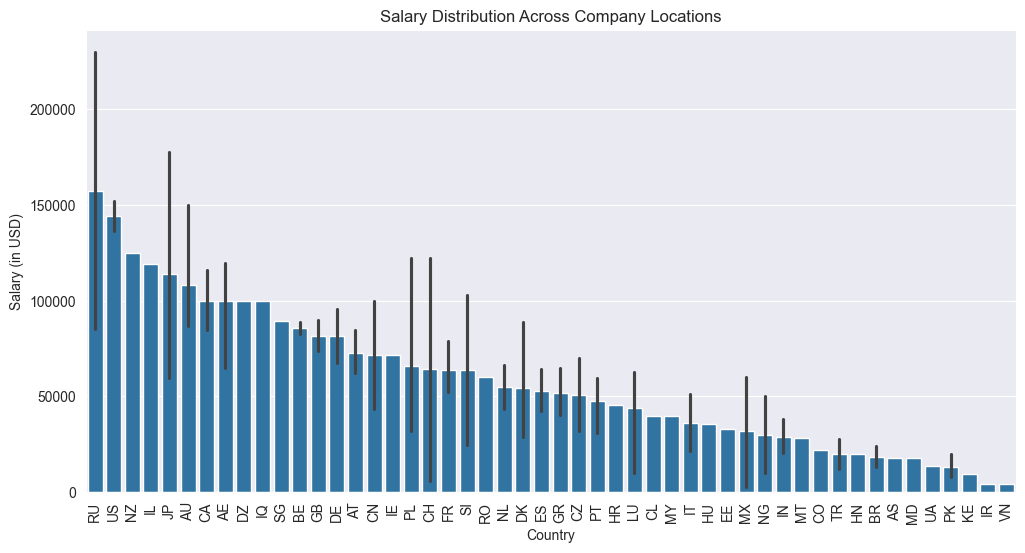

In [11]:
#Distribution of Salaries
#Plotting Salary vs Company Location (Country)
sorted_countries = dataset.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=dataset, order=sorted_countries)
plt.title('Salary Distribution Across Company Locations')
plt.xlabel('Country')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)
plt.show()

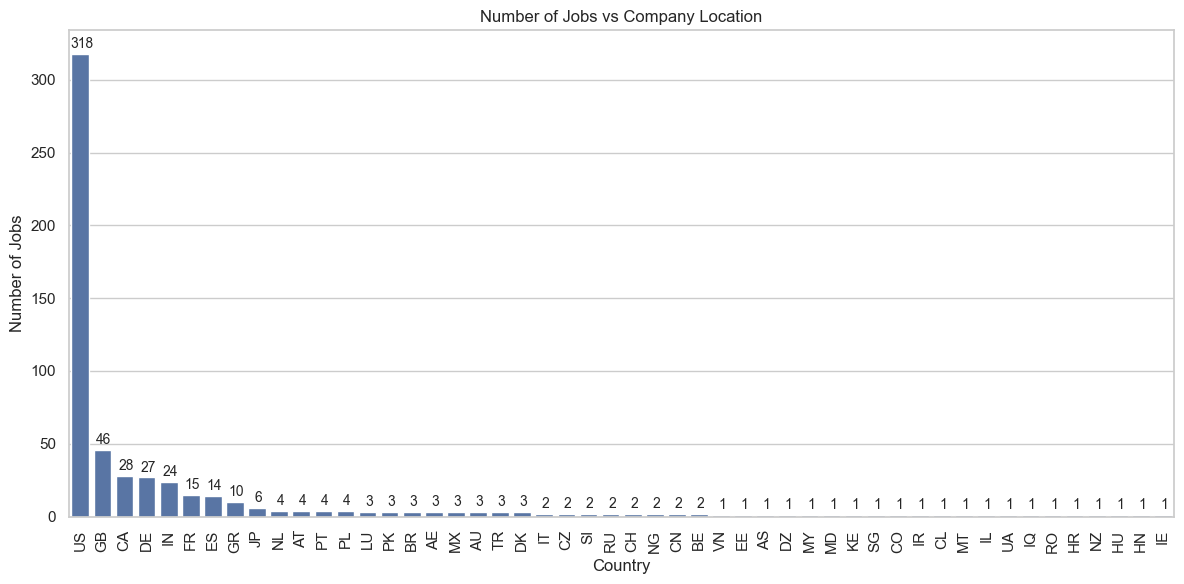

In [12]:
#Job Salaries by Company Location
sorted_country_counts = dataset['company_location'].value_counts().index                     #Sort in descending order
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  
ax = sns.countplot(x='company_location', data=dataset, order=sorted_country_counts)

# Add Labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (1, 7), 
                textcoords = 'offset points',
               fontsize=10)

plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)  
plt.title('Number of Jobs vs Company Location')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
#Number of Jobs by Company Location

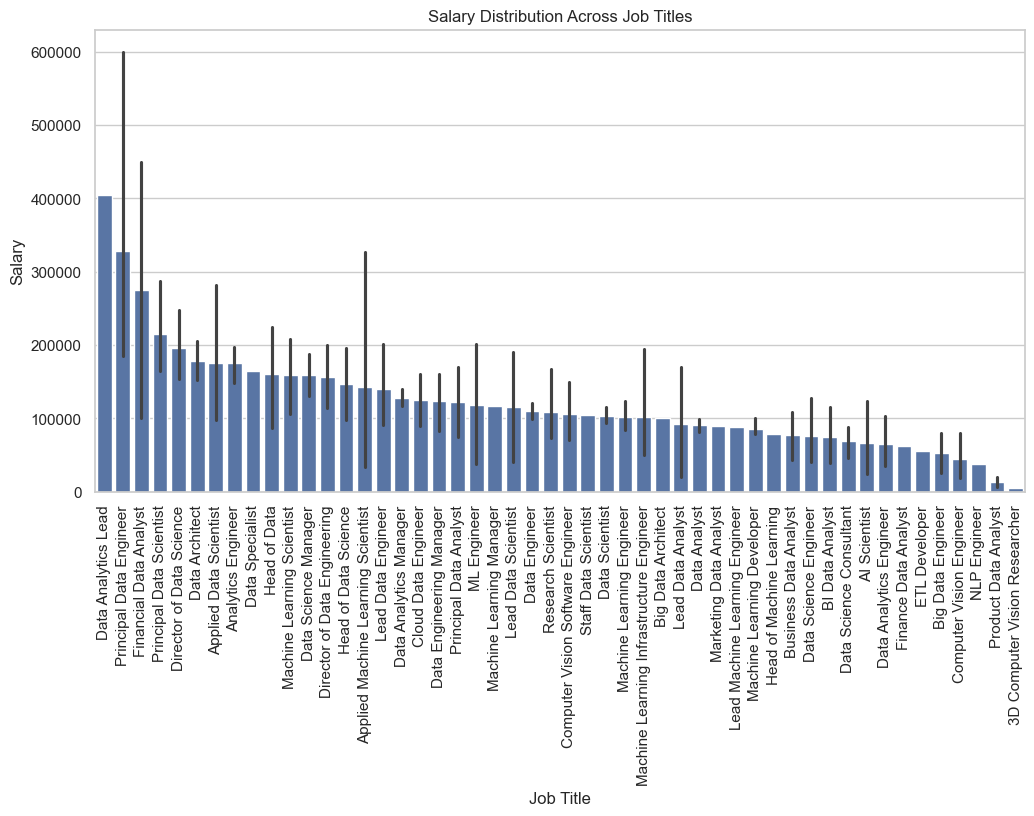

In [14]:
sorted_roles = dataset.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=dataset, order=sorted_roles)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
#Number of Jobs based on Job Title
#Data Scientist, Data Engineer, and Data Analyst are the most common Job titles, followed by more specialized job titles. This could be because most companies only need Data Scientists, Engineers and Analysts for their Data-related needs, but companies that specialize in Data-related activities

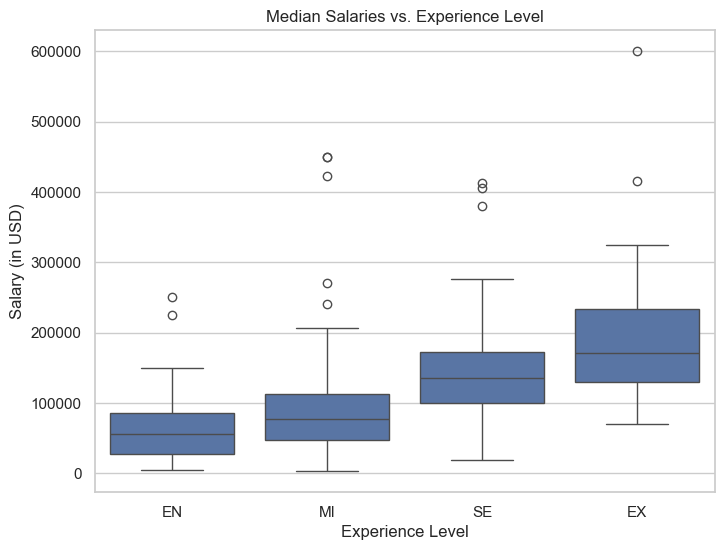

In [16]:
#Box Plot
sorted_exp = ['EN', 'MI', 'SE', 'EX'] #Order by Seniority
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='experience_level', y='salary_in_usd', order=sorted_exp)
plt.title('Median Salaries vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.show()

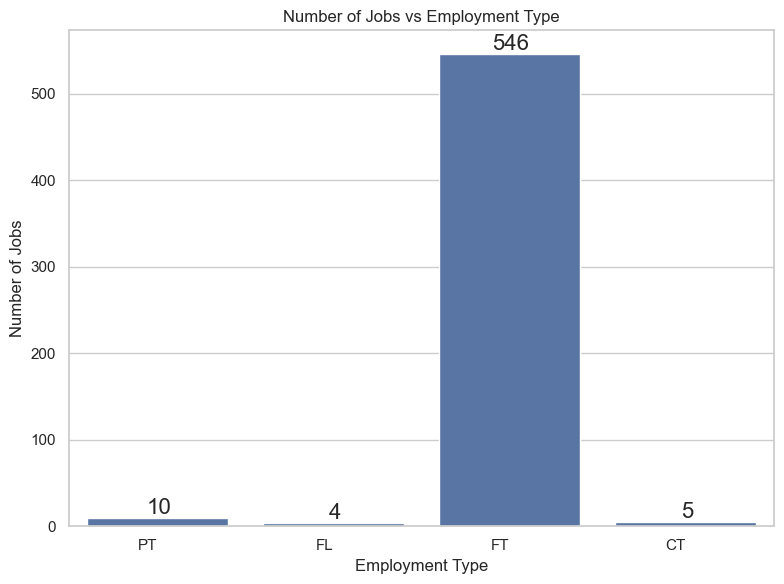

In [17]:
#Job Salaries vs Employment Type
sorted_emp = dataset.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=True).index
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  
ax = sns.countplot(x='employment_type', data=dataset, order=sorted_emp)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (1, 7), 
                textcoords = 'offset points',
               fontsize=16)

plt.xlabel('Employment Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0, ha="right")  
plt.title('Number of Jobs vs Employment Type')


plt.tight_layout() 
plt.show()

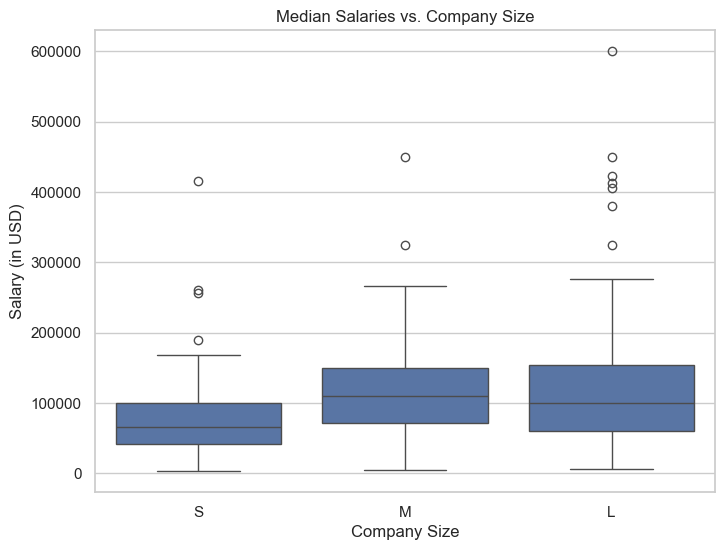

In [18]:
sorted_size = ['S','M','L']
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='company_size', y='salary_in_usd', order=sorted_size)
plt.title('Median Salaries vs. Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (in USD)')
plt.show()

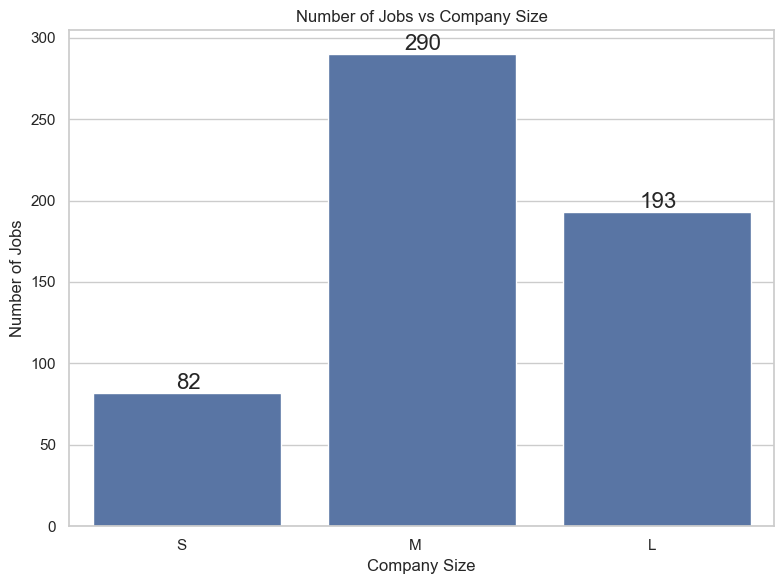

In [19]:
#Median Salaries vs Company Size
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid") 
ax = sns.countplot(x='company_size', data=dataset, order=sorted_size)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (1, 7), 
                textcoords = 'offset points',
               fontsize=16)

plt.xlabel('Company Size')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0, ha="right")  
plt.title('Number of Jobs vs Company Size')

plt.tight_layout() 
plt.show()

In [20]:
# One-hot Encoding
dataset_encoded = pd.get_dummies(dataset, columns=['experience_level', 'employment_type', 'employee_residence', 'company_location', 'company_size', 'job_title'], drop_first=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_encoded[['salary_in_usd', 'remote_ratio']] = scaler.fit_transform(dataset_encoded[['salary_in_usd', 'remote_ratio']])

dataset_encoded.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,employee_residence_AR,...,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist
0,2020,-0.426180,-1.710815,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2020,2.068630,-1.710815,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2020,-0.021966,-0.487257,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020,-1.254701,-1.710815,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2020,0.545437,-0.487257,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


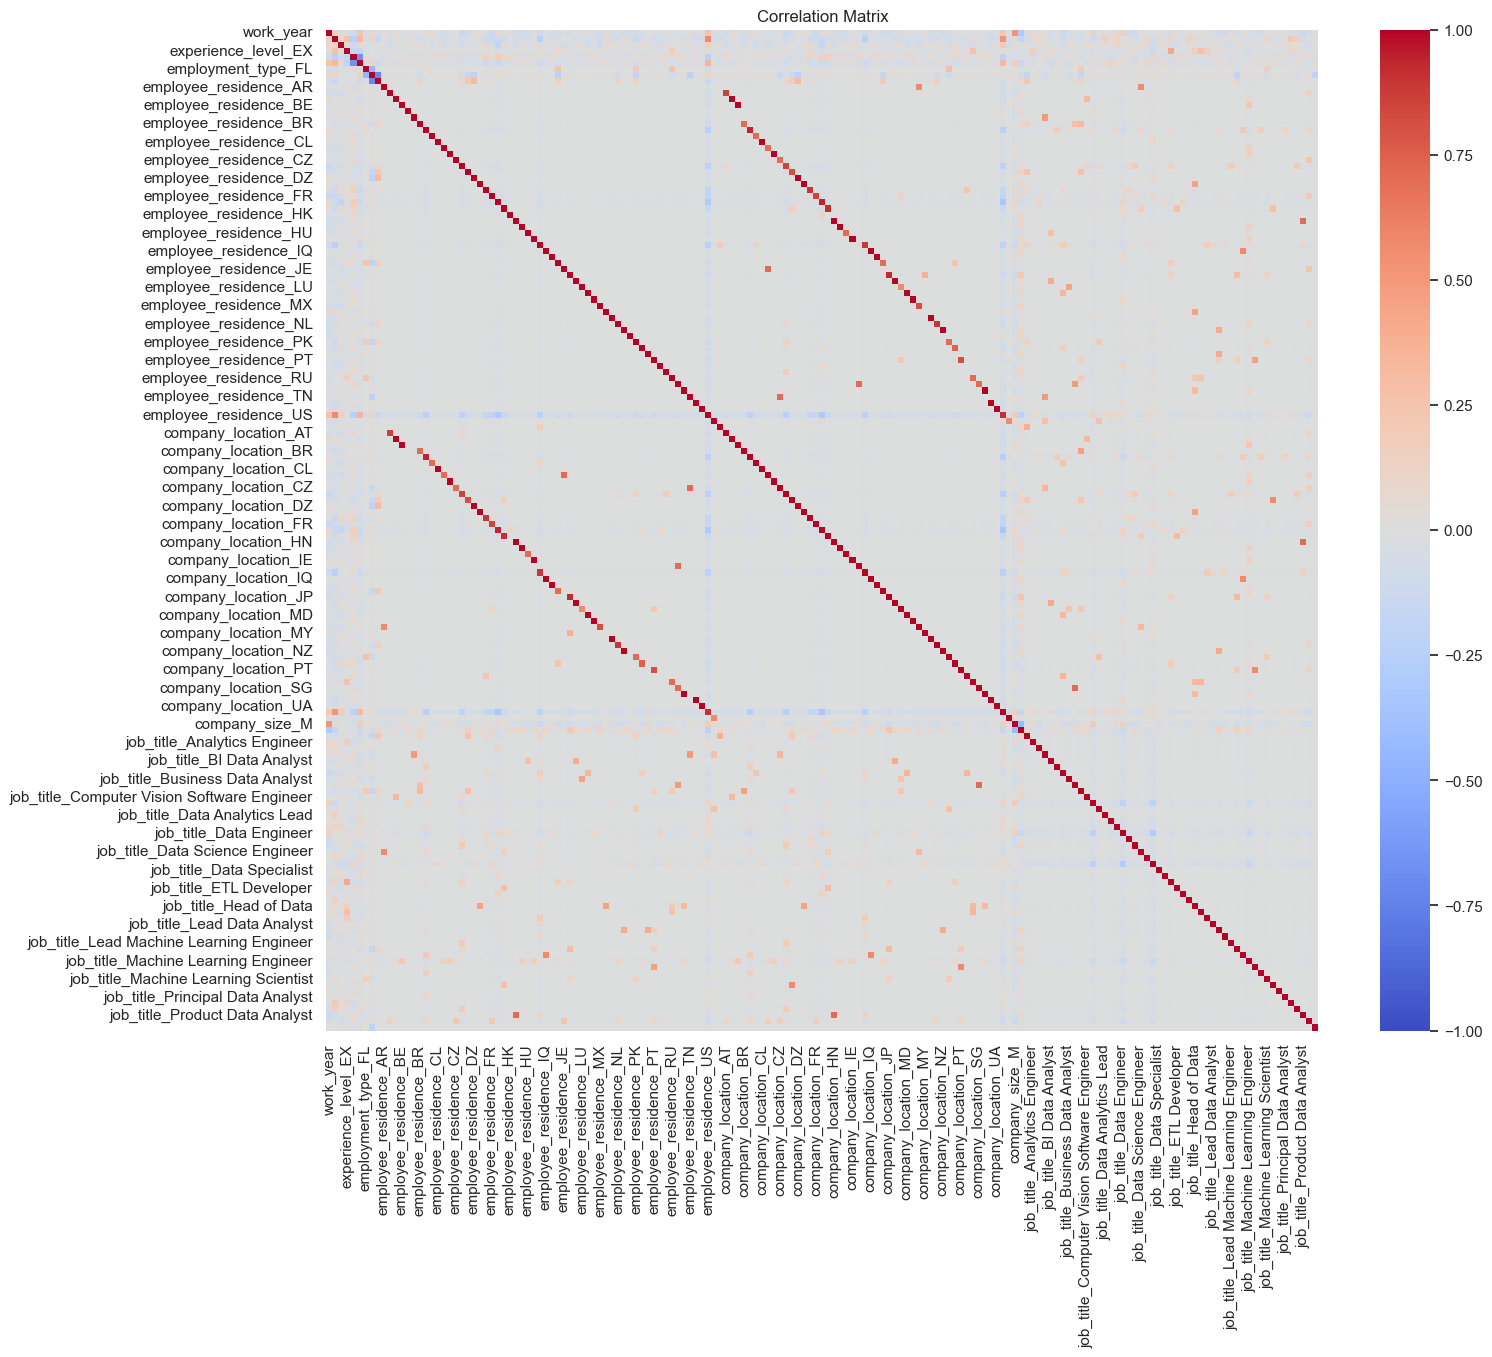

In [21]:
corr_matrix = dataset_encoded.corr()

plt.figure(figsize=(16, 13))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()